In [1]:
# Initial imports.
import numpy as np
import pandas as pd
from path import Path
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Loading data
file_path = Path("Resources/Movie_Data.csv")
movies_df = pd.read_csv(file_path)
movies_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Little Buddha (1993),Drama
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance


In [3]:
# Preprocess the data

# check which columns have empty values and see if they can be replaced, if they can not be replaced then drop the null rows

# Drop the null columns where all values are null
# This step is not necessary - movies_df = movies_df.dropna(axis='columns', how='all')

# Drop the null rows
movies_df = movies_df.dropna()
movies_df


,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Little Buddha (1993),Drama
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
5,1,1088,4.0,1147868495,Dirty Dancing (1987),Drama|Musical|Romance


In [4]:
movies_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

In [5]:
# preprocess the data

#convert timestamp column into datetime
from datetime import datetime
# how is datetime send to model? 
# this column represents - time movie was rated or time movie was watched?


In [6]:
print(movies_df.genres.value_counts())

Drama                          3
Comedy|Crime|Drama|Thriller    1
Comedy|Musical|Romance         1
Drama|Musical|Romance          1
Name: genres, dtype: int64


In [7]:
# preprocess data
# convert genres into separate columns, using custom function instead of getDummies 
print(movies_df.genres.value_counts())
movies_df = pd.get_dummies(movies_df, columns = ['genres'])
movies_df.head()

Drama                          3
Comedy|Crime|Drama|Thriller    1
Comedy|Musical|Romance         1
Drama|Musical|Romance          1
Name: genres, dtype: int64


,userId,movieId,rating,timestamp,title,genres_Comedy|Crime|Drama|Thriller,genres_Comedy|Musical|Romance,genres_Drama,genres_Drama|Musical|Romance
0,1,296,5.0,1147880044,Pulp Fiction (1994),1,0,0,0
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),0,0,1,0
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),0,0,1,0
3,1,665,5.0,1147878820,Little Buddha (1993),0,0,1,0
4,1,899,3.5,1147868510,Singin' in the Rain (1952),0,1,0,0


In [8]:
movies_df.select_dtypes(include=['object']).columns

Index(['title'], dtype='object')

In [9]:
movies_df.title.value_counts()


Pulp Fiction (1994)                                 1
Three Colors: Red (Trois couleurs: Rouge) (1994)    1
Three Colors: Blue (Trois couleurs: Bleu) (1993)    1
Little Buddha (1993)                                1
Singin' in the Rain (1952)                          1
Dirty Dancing (1987)                                1
Name: title, dtype: int64

In [10]:
# movies_df.genres.value_counts()
movies_df.shape

(6, 9)

In [11]:
# Use label encoder on title column, if movie title is sent to model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movies_df['encoded_title'] = le.fit_transform(movies_df['title'])
movies_df
movie_title_df = pd.DataFrame(movies_df['title'],index=movies_df.index)
#Drop title column 
# movies_df = movies_df.drop(['title'], axis=1)


# #OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# movies_df.title.value_counts()
# movies_df['encoded_title'] = ohe.fit_transform([['title']])
# movies_df
# movie_title_df = pd.DataFrame(movies_df['title'],index=movies_df.index)
#Drop title column 
# movies_df = movies_df.drop(['title'], axis=1)

#Column Transformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[4])], remainder='passthrough')
# # dataset = columnTransformer.fit_transform(movies_df)

# dataset = np.array(columnTransformer.fit_transform(movies_df), dtype = np.str)
# dataset.shape


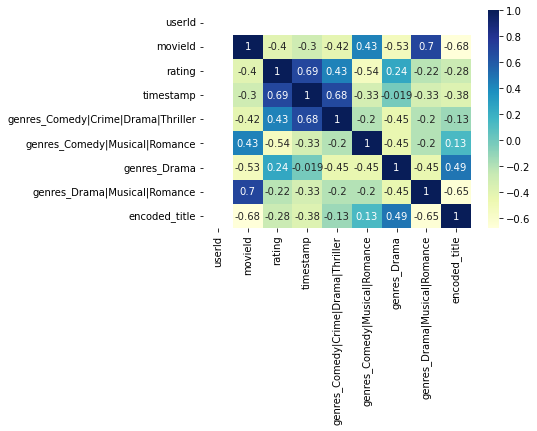

In [12]:
# correlation function to see which columns are connected to ratings, 
# if corr is high then send it to model, if low then delete the column, closer to -1 means negativee cor, closer to 1 is positive corr


# print(movies_df.corr())
# print(movies_df["title"])

# plotting correlation heatmap
dataplot = sb.heatmap(movies_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [13]:


# remove userid, movieID columns
X = movies_df.drop(['userId','movieId','title'], axis =1)
y = movies_df[['rating']]

# X = movies_df.drop(['userId','movieId'], axis =1)
# X.dropna(inplace=True)
# y = X[['rating']].to_numpy()
# X.drop(['rating'],axis=1,inplace=True)
# X = X.to_numpy()

In [14]:
X.describe()

,rating,timestamp,genres_Comedy|Crime|Drama|Thriller,genres_Comedy|Musical|Romance,genres_Drama,genres_Drama|Musical|Romance,encoded_title
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.333333,1.147872e+09,0.166667,0.166667,0.500000,0.166667,2.500000
std,0.752773,5.576639e+03,0.408248,0.408248,0.547723,0.408248,1.870829
min,3.500000,1.147868e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.625000,1.147869e+09,0.000000,0.000000,0.000000,0.000000,1.250000
50%,4.500000,1.147869e+09,0.000000,0.000000,0.500000,0.000000,2.500000
75%,5.000000,1.147876e+09,0.000000,0.000000,1.000000,0.000000,3.750000
max,5.000000,1.147880e+09,1.000000,1.000000,1.000000,1.000000,5.000000


In [15]:
# y['rating'].value_counts()

In [16]:
# Splitting into Train and Test sets.
# default test_size is .25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78,test_size=0.33)

In [17]:
# Creating a StandardScaler instance.
# note: don't need to use feature scaling techniques for Random Forest and Decision trees algorithms
# Note: need to use feature scaling for linear regression, gradient descent optimization, K-nearest neighbors

# scalar = MinMaxScalar()
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Linear Regression

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# lr.fit(X, y)
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [19]:
# print slope 
print(lr.coef_)


[[ 0.62989866  0.00124158 -0.00087069  0.          0.04572179 -0.05192428
  -0.08700542]]


In [20]:
# print  y-intercept

print(lr.intercept_)

[4.375]


In [21]:
predictions= lr.predict(X_test_scaled)
predictions

array([[5.13845331],
       [3.49909588]])

In [22]:
# Accuracy assessment: R squared
lr.score(X_test_scaled, predictions)

1.0

In [23]:
# Display performance metrics
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions)) 

MAE:  0.06967871143006743
MSE:  0.009585067605907403


In [28]:
y_test

,rating
3,5.0
4,3.5


In [42]:
predictions

array([[5.13845331],
       [3.49909588]])

In [62]:
# Merge movies_df with y_test - to used for graphs
movie_lr_test = pd.merge(movies_df,y_test,how = 'inner', right_index = True, left_index = True)
movie_lr_test



,userId,movieId,rating_x,timestamp,title,genres_Comedy|Crime|Drama|Thriller,genres_Comedy|Musical|Romance,genres_Drama,genres_Drama|Musical|Romance,encoded_title,rating_y
3,1,665,5.0,1147878820,Little Buddha (1993),0,0,1,0,1,5.0
4,1,899,3.5,1147868510,Singin' in the Rain (1952),0,1,0,0,3,3.5


In [63]:
# # Merge movies_df with y_pred - to used for graphs
# movie_lr_pred = pd.merge(movies_df,pd.DataFrame(predictions),how = 'inner', right_index = True, left_index = True)
# movie_lr_pred

,userId,movieId,rating,timestamp,title,genres_Comedy|Crime|Drama|Thriller,genres_Comedy|Musical|Romance,genres_Drama,genres_Drama|Musical|Romance,encoded_title,0
0,1,296,5.0,1147880044,Pulp Fiction (1994),1,0,0,0,2,5.138453
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),0,0,1,0,5,3.499096


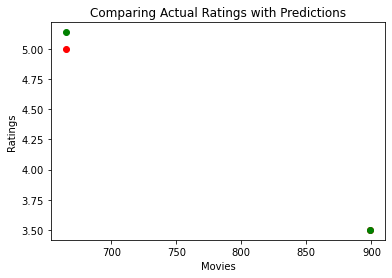

In [80]:
# this plot is not necessary
# # scatter plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis
import matplotlib.pyplot as plt


# plt.scatter(movie_title_df['title'], y_test, color = "red")
# plt.scatter(movie_lr_test['title'], y_test, color = "red")
# plt.scatter(movie_lr_test['title'], predictions, color = "green")
plt.scatter(movie_lr_test['movieId'], y_test, color = "red")
plt.scatter(movie_lr_test['movieId'], predictions, color = "green")

plt.title("Comparing Actual Ratings with Predictions")
plt.xlabel("Movies")
plt.ylabel("Ratings")
plt.show()

### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Loading data
file_path = Path("Resources/Movie_Data.csv")
movies_RF_df = pd.read_csv(file_path)
movies_RF_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Little Buddha (1993),Drama
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance


In [45]:
#preprocess data
# preprocess data
# convert genres into separate columns, using custom function instead of getDummies 
print(movies_RF_df.genres.value_counts())
movies_RF_df = pd.get_dummies(movies_RF_df, columns = ['genres'])
# movies_RF_df.head()

Drama                          3
Comedy|Crime|Drama|Thriller    1
Comedy|Musical|Romance         1
Drama|Musical|Romance          1
Name: genres, dtype: int64


In [46]:
# remove userid, movieID columns
X = movies_RF_df.drop(['userId','movieId','title'], axis =1)
y = movies_RF_df[['rating']]

# X = movies_df.drop(['userId','movieId'], axis =1)
# X.dropna(inplace=True)
# y = X[['rating']].to_numpy()
# X.drop(['rating'],axis=1,inplace=True)
# X = X.to_numpy()

# Splitting into Train and Test sets.
# default test_size is .25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78,test_size=0.33)




In [ ]:
# # Creating a StandardScaler instance.
# scaler = StandardScaler()
# # Fitting the Standard Scaler with the training data.
# X_scaler = scaler.fit(X_train)

# # Scaling the data.
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [72]:
# Create a random forest Regressor
k = 5
rf_model = RandomForestRegressor(n_estimators=128, random_state=78, max_depth = k) 

# Fitting the model
rf_model.fit(X_train, y_train.values.ravel())

#score the model?
#rf_model.score(X_train,y_train)

# Making predictions using the testing data.
y_rf_pred = rf_model.predict(X_test)

# Display performance metrics
print('MAE: ', mean_absolute_error(y_test, y_rf_pred))
print('MSE: ', mean_squared_error(y_test, y_rf_pred))

  



MAE:  0.28515625
MSE:  0.0969390869140625


In [48]:
X_test.index
print(y_rf_pred)
print(y_pred)

Int64Index([3, 4], dtype='int64')

In [76]:
# Merge movies_df with y_test - to used for graphs
X_rfr_test = pd.merge(movies_df,y_test,how = 'inner', right_index = True, left_index = True)
X_rfr_test

,userId,movieId,rating_x,timestamp,title,genres_Comedy|Crime|Drama|Thriller,genres_Comedy|Musical|Romance,genres_Drama,genres_Drama|Musical|Romance,encoded_title,rating_y
3,1,665,5.0,1147878820,Little Buddha (1993),0,0,1,0,1,5.0
4,1,899,3.5,1147868510,Singin' in the Rain (1952),0,1,0,0,3,3.5


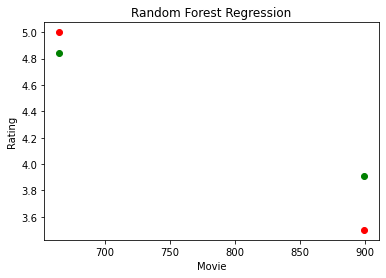

In [79]:
plt.scatter(X_rfr_test['movieId'].values, y_test, color = 'red')
plt.scatter(X_rfr_test['movieId'].values, y_pred, color = 'green')
# plt.scatter(X_rfr_test['title'].values, y_test, color = 'red')
# plt.scatter(X_rfr_test['title'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.show() 

In [ ]:
# Calculate feature importance in the Random Forest model.
features = rf_model.feature_importances_
# importances

# sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)



In [ ]:
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:
# join predictions with dataframe based on index

### Decision Tree Regressor

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)

# Predict

result = regr.predict(X_test)

print(result)

### Support Vector Regression

In [ ]:
# Loading data
file_path = Path("Resources/Movie_Data.csv")
movies_SVR_df = pd.read_csv(file_path)
movies_SVR_df.head()

In [ ]:
# from sklearn.svm import SVR

# svr = SVR().fit(X, y)

# svr.predict(X_test)

### Lasso Regression

In [ ]:
from sklearn import linear_model
import numpy as np


# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg